# Concentration de CO2 dans l'atmosphère depuis 1958

In [1]:
import os
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Dans un premier temps, nous vérifions que le fichier de données local est présent, sinon nous le téléchargeons depuis l'URL.

In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv"
data_file = "weekly_in_situ_co2_mlo.csv"

if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

Les données sont ensuite chargées à l'aide de pandas.

In [3]:
raw_data = pd.read_csv(data_file, skiprows=44, names=["Date", "CO2"])

new_data = raw_data.copy()
new_data.set_index("Date", drop=True, inplace=True)             
new_data.index = pd.to_datetime(new_data.index, format="%Y-%m-%d")

new_data.head(5)

CO2
Date              
1958-03-29  316.19
1958-04-05  317.31
1958-04-12  317.69
1958-04-19  317.58
1958-04-26  316.48

Nous vérifions la présence de données manquantes.

In [8]:
new_data[new_data.isnull().any(axis=1)]

<bound method DataFrame.info of Empty DataFrame
Columns: [CO2]
Index: []>

Nous vérifions à présent si il n'y a pas de semaines manquantes.

Aucune donnée n'est visiblement manquante dans le fichier.

Text(0,0.5,'$\\rm CO_2$ [ppm]')

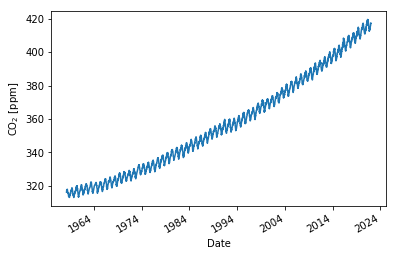

In [13]:
new_data["CO2"].plot()
plt.ylabel(r"$\rm CO_2$ [ppm]")